<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Ezra Pasha Ramadhansyah"
KELAS = "F"
NPM = "2006597872"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = ["https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Ezra Pasha Ramadhansyah dari kelas F dengan NPM 2006597872, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Ezra Pasha Ramadhansyah)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [3]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [4]:
pingu = pd.read_csv("D:\Backup\Kuliah\KASDD files\penguin.csv")

display(pingu.head())

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [5]:
print(pingu.count())

pulau_habitat         344
panjang_paruh_atas    342
tebal_paruh_atas      342
panjang_sirip         342
massa_tubuh           342
jenis_kelamin         334
dtype: int64


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [6]:
display(pingu.describe())

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [7]:
display(pingu.fillna(pingu.mean()))

C:\Users\DELL\AppData\Local\Temp\ipykernel_15256\2746004017.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(pingu.fillna(pingu.mean()))


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...
339,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

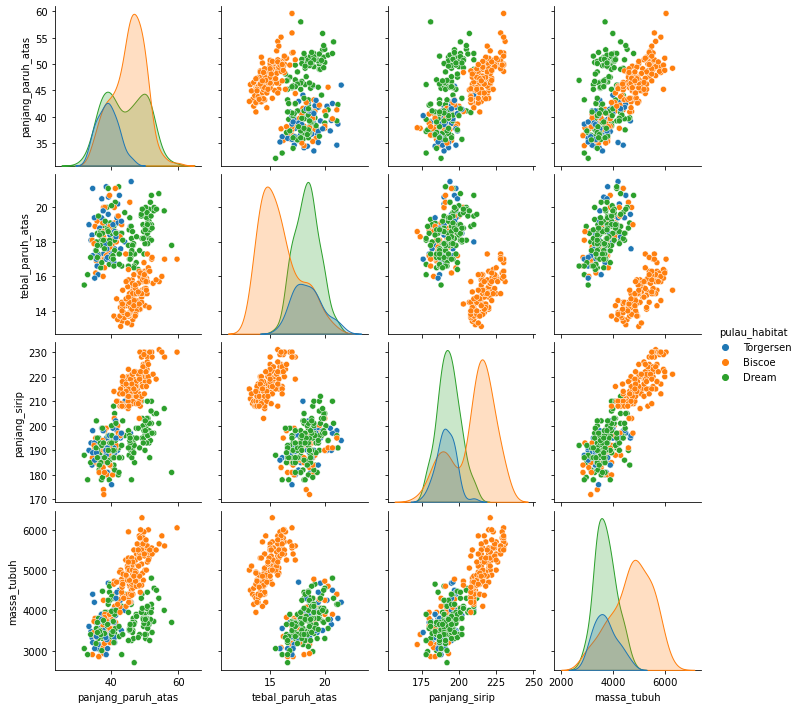

In [8]:
sns.pairplot(pingu, hue="pulau_habitat")

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

C:\Users\DELL\AppData\Local\Temp\ipykernel_15256\3135574310.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pingu_df = pingu[["panjang_paruh_atas","tebal_paruh_atas","panjang_sirip","massa_tubuh"]].fillna(pingu.mean())


[0.68843878 0.19312919 0.09130898 0.02712305]


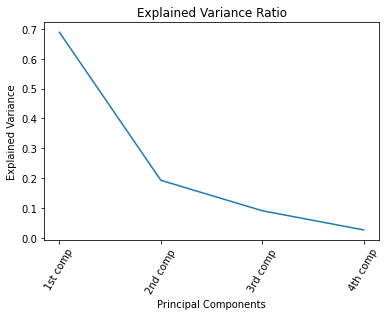

In [9]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

pca = PCA()

pingu_df = pingu[["panjang_paruh_atas","tebal_paruh_atas","panjang_sirip","massa_tubuh"]].fillna(pingu.mean())

scaler = StandardScaler()
scaler.fit(pingu_df)

scaled_data = scaler.transform(pingu_df)

pca.fit(scaled_data)
trans_pca = pca.transform(scaled_data)
trans_pca.shape

explained_variants = pca.explained_variance_ratio_

print(explained_variants)
plt.plot(range(0,4), explained_variants)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,4),
           ["1st comp", "2nd comp", "3rd comp", "4th comp"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

> Atribut yang akan saya pilih adalah ```massa_tubuh``` dan ```tebal_paruh_atas```. Karena dua komponen tersebut sudah merangkap setidaknya 87% dari data

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [10]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.529534374684656
For n_clusters = 3 The average silhouette_score is : 0.44383987920001977
For n_clusters = 4 The average silhouette_score is : 0.3974735945484643
For n_clusters = 5 The average silhouette_score is : 0.3749998013324226
For n_clusters = 6 The average silhouette_score is : 0.36840411408954227


> Dari hasil silhouette analysis di atas, bisa dilihat bahwa K ideal adalah 2. Ini karen 2 memiliki average silhouette_score yang paling tinggi dibandingkan dengan average yang lain. Perlu diketahui bahwa meski K ideal adalah 2, average silhouette score dari K = 2 hanya memiliki medium structure karena average silhouette coefficient masih lebih kecil dari 0.7

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [11]:
clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(scaled_data)

pingu_df["Cluster"] = cluster_labels

display(pingu_df)

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,Cluster
0,39.10000,18.70000,181.000000,3750.000000,1
1,39.50000,17.40000,186.000000,3800.000000,1
2,40.30000,18.00000,195.000000,3250.000000,1
3,43.92193,17.15117,200.915205,4201.754386,1
4,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,1
340,46.80000,14.30000,215.000000,4850.000000,0
341,50.40000,15.70000,222.000000,5750.000000,0
342,45.20000,14.80000,212.000000,5200.000000,0


9. Visualisasikan klaster yang ada [5]

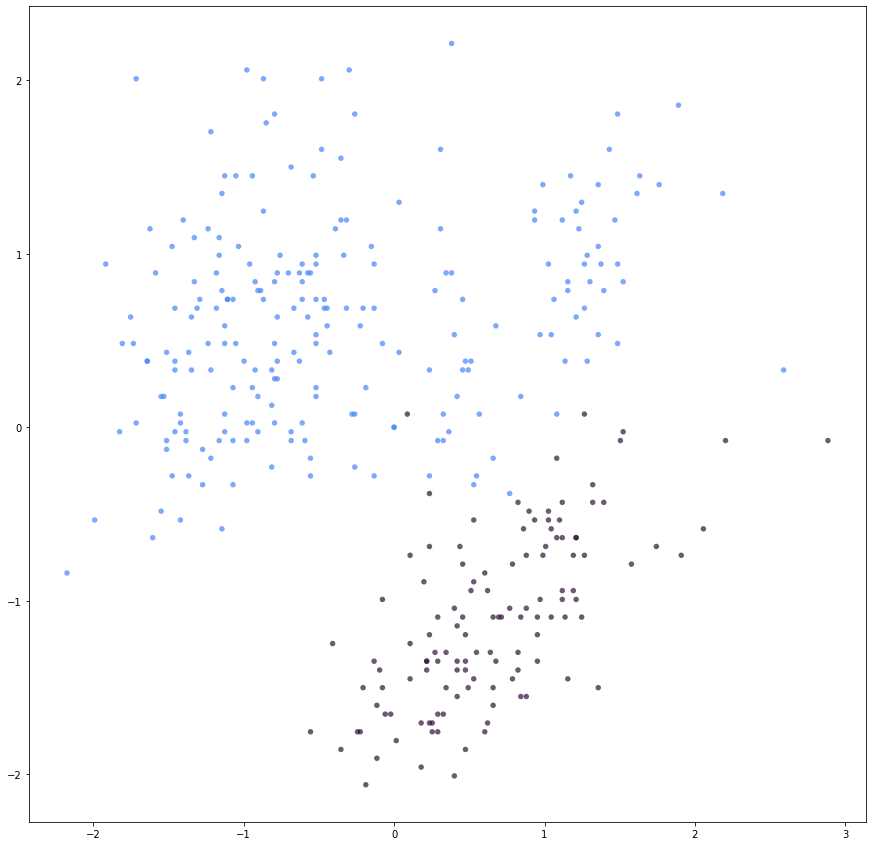

In [17]:
f, ax = plt.subplots(figsize=(15,15))
colors = cm.turbo(cluster_labels.astype(float) / n_clusters)
ax.scatter(
    scaled_data[:, 0], scaled_data[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

10. Berikan interpretasi dari klaster yang dihasilkan [5]

> Terdapat dua klaster, satu yang di atas dan satu di bawah. Keduanya terbagi berdasarkan ukuran paruhnya. Klaster atas (biru) memiliki panjang paruh atas yang lebih besar dan tebal paruh atas yang lebih besar. Klaster bawah (hitam) memiliki panjang paruh lebih kecil dan tebal paruh lebih kecil. Ini berarti klaster terbagi berdasarkan ukuran paruh dari pinguin

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [13]:
agg_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaled_data)

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

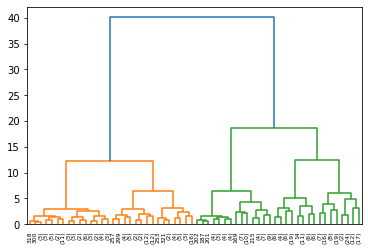

<Figure size 1800x1800 with 0 Axes>

Jumlah klaster yang dihasilkan adalah 2 sehingga optimal dengan data sebelumnya


In [14]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    shc.dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agg_clust, truncate_mode='level', p=5)
plt.figure(figsize=(25, 25))
plt.show()

print("Jumlah klaster yang dihasilkan adalah 2 sehingga optimal dengan data sebelumnya")

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [15]:
agg_clust_2 = AgglomerativeClustering(distance_threshold=None, n_clusters=2).fit(scaled_data)

14. Visualisasikan hasil *clustering assignment* [4]

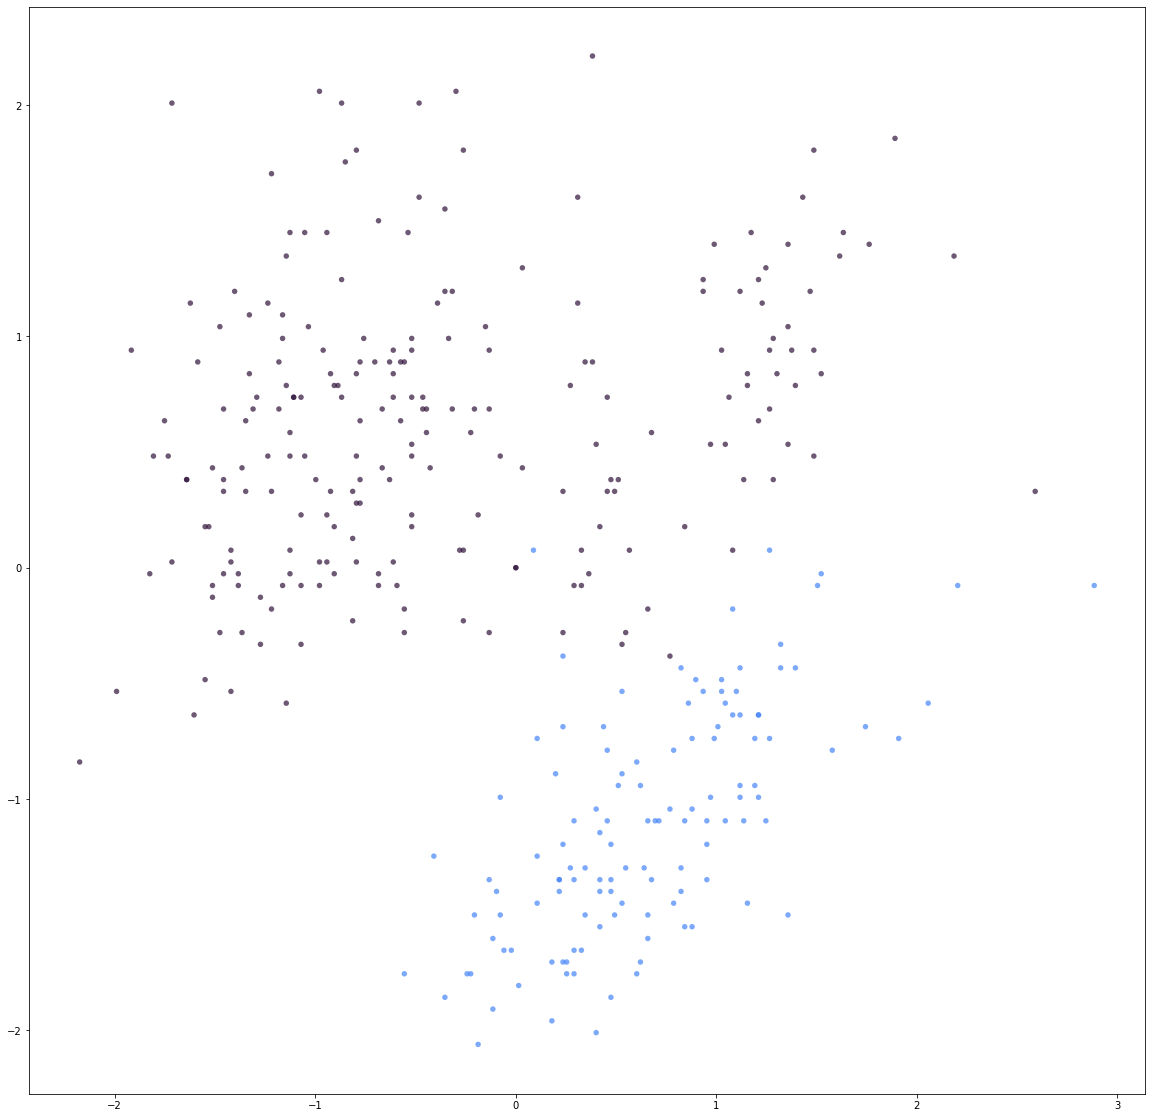

In [16]:
f, ax = plt.subplots(figsize=(20,20))
colors = cm.turbo(agg_clust_2.labels_.astype(float) / n_clusters)
ax.scatter(
    scaled_data[:, 0], scaled_data[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]

Dengan data categorical kita bisa menerapkan feature transformation sehingga categorical feature dapat diubah menjadi data numerik.

16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]

Karena K-means mengukur berdasarkan jarak, suatu K-Means clustering akan memiliki bentuk globular sehingga dataset yang tidak globular bisa akan memiliki clustering yang tidak sesuai

17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]

Karena metode K-means memerlukan pengambilan titik random, ada kemungkinan besar hasil yang didapat berbeda-beda pada setiap iterasi. Ada juga kemungkinan suatu cluster memiliki hasil yang sama tetapi nomor cluster yang diasign kmeans terbalik

18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

Intra class similarity dapat dihitung menggunakan elbow method dimana kita menghitung jarak paling jauh diantara dua titik data pada suatu cluster dan membandingkannya dengan jarak paling jauh pada cluster yang lebih banyak. Bila kita membuat grafik dari jarak cluster tersebut, kita mengambil jarak cluster yang berada diantara grafis curam dan grafis yang mendatar (yang terlihat seperti elbow). 

Inter class similarity dapat dihitung menggunakan silhouette coeficient yang memiliki rumus SC = b-a/max(a,b). Semakin besar SC semakin beda cluster yang ada.

Cluster akan dianggap baik bila jumlah cluster sesuai dengan yang ada di elbow method dan silhouette coeficient lebih dari 0.7